# Unsupervised Learning

### Practice (1) : K-Means Basics

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
np.random.seed(5)

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
estimators = [
    ("k_means_iris_3", KMeans(n_clusters=3, n_init="auto")),
]

In [5]:
X.shape

(150, 4)

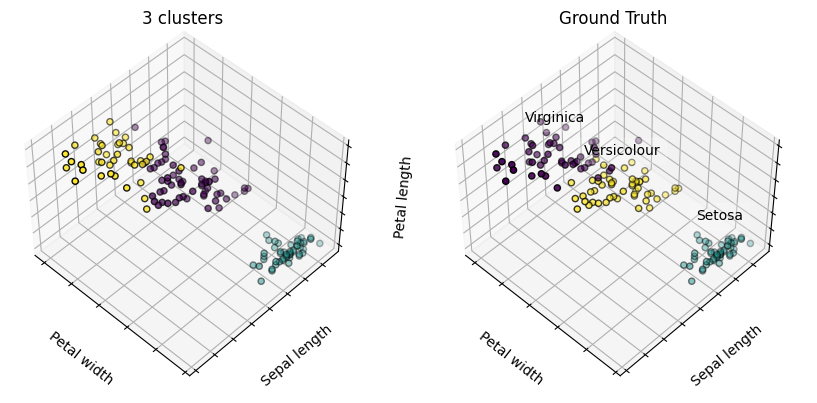

In [6]:
fig = plt.figure(figsize=(10, 8))
titles = ["3 clusters"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(1, 2, idx + 1, projection="3d", elev=48, azim=134)

    # fit k-means algorithm
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(1, 2, 2, projection="3d", elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

### Practice (2) : K-Means Basics

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.cluster import KMeans

In [8]:
np.random.seed(5)

In [9]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

### Cluster Visuals

In [10]:
def plot_clusters(_model=None, X=X, y=y):
    estimators = {("k_means_iris_3", _model),}
    fig = plt.figure(figsize=(10, 8))
    titles = ["3 clusters"]
    for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
        ax = fig.add_subplot(1, 2, idx + 1, projection="3d", elev=48, azim=134)
        est.fit(X)
        labels = est.labels_

        ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        ax.zaxis.set_ticklabels([])
        ax.set_xlabel("Petal width")
        ax.set_ylabel("Sepal length")
        ax.set_zlabel("Petal length")
        ax.set_title(title)

    # Plot the ground truth
    ax = fig.add_subplot(1, 2, 2, projection="3d", elev=48, azim=134)

    for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
        ax.text3D(
            X[y == label, 3].mean(),
            X[y == label, 0].mean(),
            X[y == label, 2].mean() + 2,
            name,
            horizontalalignment="center",
            bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
        )
    # Reorder the labels to have colors matching the cluster results
    y = np.choose(y, [1, 2, 0]).astype(float)
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title("Ground Truth")

    plt.subplots_adjust(wspace=0.25, hspace=0.25)
    plt.show()

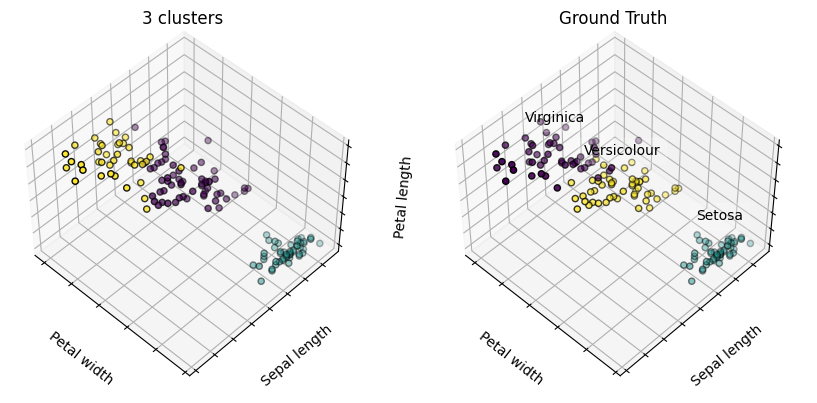

In [11]:
kmeans_model = KMeans(n_clusters=3, n_init="auto")
plot_clusters(kmeans_model)

In [12]:
kmeans_model.n_clusters

3

In [13]:
kmeans_model.cluster_centers_, kmeans_model.cluster_centers_.shape, X.shape

(array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
        [5.006     , 3.428     , 1.462     , 0.246     ],
        [6.85384615, 3.07692308, 5.71538462, 2.05384615]]),
 (3, 4),
 (150, 4))

In [14]:
 # Soft clustring
kmeans_model.transform(X)

array([[3.41251117, 0.14135063, 5.03132789],
       [3.38963991, 0.44763825, 5.08750645],
       [3.56011415, 0.4171091 , 5.25229169],
       [3.412319  , 0.52533799, 5.12704282],
       [3.4603117 , 0.18862662, 5.07638109],
       [3.14251434, 0.67703767, 4.6529179 ],
       [3.50715704, 0.4151867 , 5.18485505],
       [3.32903073, 0.06618157, 4.97466956],
       [3.56110404, 0.80745278, 5.3020706 ],
       [3.34972272, 0.37627118, 5.04034023],
       [3.31978466, 0.4824728 , 4.86909709],
       [3.30275389, 0.25373214, 4.96948678],
       [3.45734945, 0.50077939, 5.1637448 ],
       [3.89486669, 0.91322505, 5.62559662],
       [3.64453145, 1.01409073, 5.07819914],
       [3.49280098, 1.20481534, 4.85660046],
       [3.49087612, 0.6542018 , 5.00219478],
       [3.37762449, 0.1441527 , 4.99534695],
       [3.10971292, 0.82436642, 4.58840834],
       [3.37135761, 0.38933276, 4.94411371],
       [3.06922637, 0.46344363, 4.66670189],
       [3.30868004, 0.3286031 , 4.89580185],
       [3.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


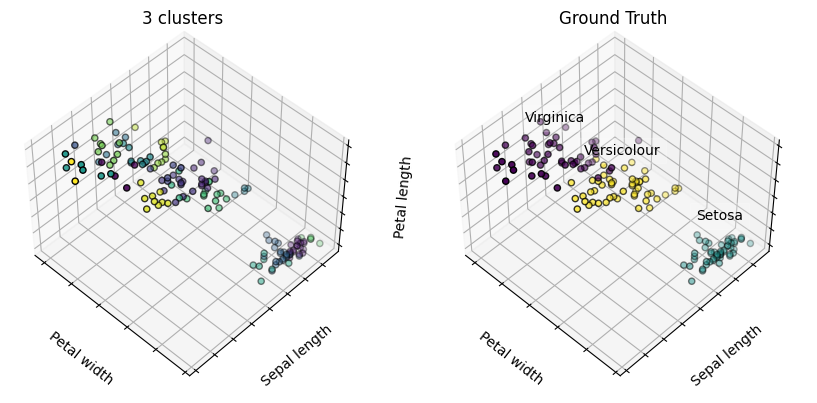

In [15]:
kmeans_model_2 = KMeans(n_clusters=20)
plot_clusters(kmeans_model_2)

### Practice (2) : Elbow Method

In [16]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

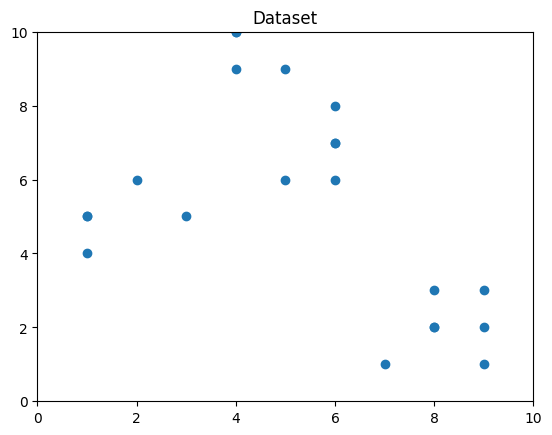

In [17]:
# Creating the data
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6,\
               7, 8, 9, 8, 9, 9, 8, 4, 4, 5, 4])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, \
               1, 2, 1, 2, 3, 2, 3, 9, 10, 9, 10])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

# Visualizing the data
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

In [18]:
X.shape

(21, 2)

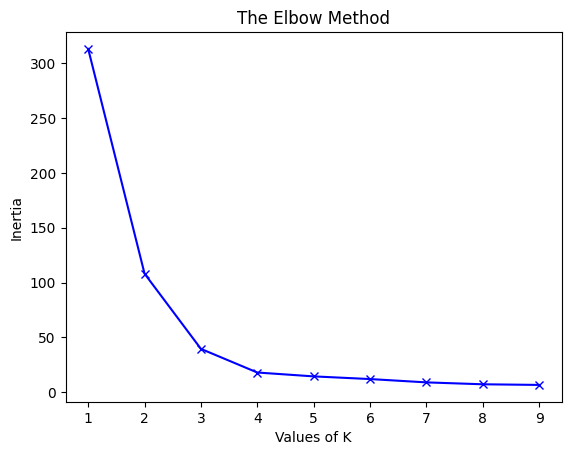

In [19]:
 inertias = []

K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    inertias.append(kmeanModel.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

### Practice (3) : K-Means Hyperparameters

In [20]:
import numpy as np
from sklearn.datasets import load_digits

from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [21]:
data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [22]:
# lables here are used for clustring metrcis
labels

array([0, 1, 2, ..., 8, 9, 8])

### Evaluation metric

In [23]:
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

### comparing using clusters

In [24]:
print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

# Case 1
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

# Case 2
kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

# Case 3
pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.457s	69662	0.680	0.719	0.699	0.570	0.695	0.173
random   	0.139s	69707	0.675	0.716	0.694	0.560	0.691	0.175
PCA-based	0.108s	74152	0.653	0.683	0.668	0.539	0.664	0.133
__________________________________________________________________________________


### Practice (4) : PCA Basics - Reconstruction image loss



In [25]:
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn import cluster, decomposition
from sklearn.datasets import fetch_olivetti_faces
from matplotlib import pyplot as plt

In [26]:
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=11)
n_samples, n_features = faces.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [27]:
faces.shape

(400, 4096)

In [28]:
X = faces

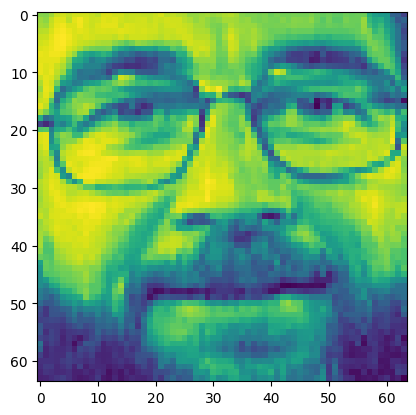

In [29]:
plt.imshow(faces[0].reshape((64, 64)))

In [30]:
 pca = decomposition.PCA(0.9)
pca.fit(X)

PCA(n_components=0.9)

In [31]:
X = pca.transform(X)

In [32]:
X.shape, faces.shape

((400, 66), (400, 4096))

In [33]:
pca.n_components_

66

In [34]:
 X_reverse = pca.inverse_transform(X)
 X_reverse.shape

(400, 4096)

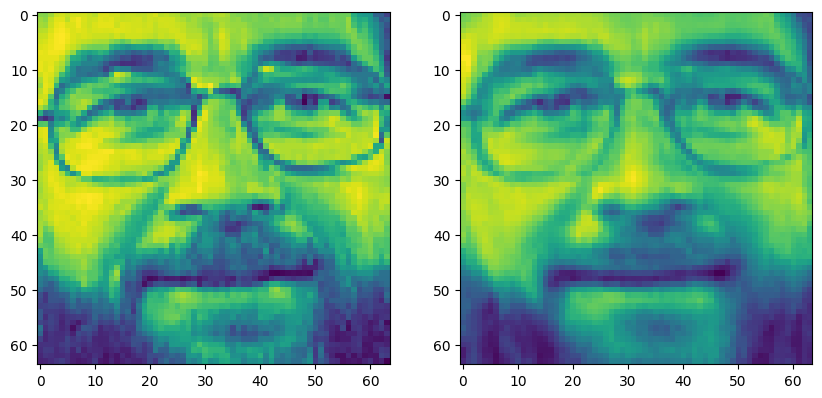

In [35]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(121).imshow(
    faces[0].reshape((64, 64))
)
fig.add_subplot(122).imshow(
    X_reverse[0].reshape((64, 64))
)

### Practice (5) : PCA Basics

In [36]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets, decomposition

In [37]:
np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [38]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_orig = X
X = pca.transform(X)

In [39]:
X_orig.shape, X.shape

((150, 4), (150, 3))

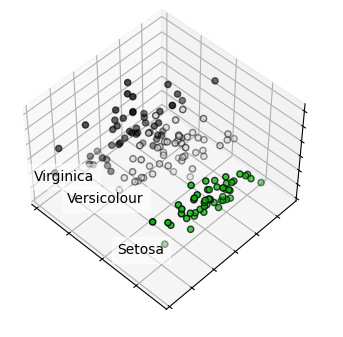

In [40]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

plt.cla()

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()